In [38]:
import math
import scipy.stats
import scipy.optimize
import numpy
import plotly.express as px

In [39]:
def getData(direction):
    sample_distribution_file = open(direction, "r")
    data = [float(x.replace(",", ".")) for x in sample_distribution_file.read().splitlines()]
    return data

In [57]:
path = "../continuous/data/data_dagum_4P.txt"
data = getData(path)

In [41]:
def num_bins_doane(data):
    N = len(data)
    skewness = scipy.stats.skew(data)
    sigma_g1 = math.sqrt((6 * (N - 2)) / ((N + 1) * (N + 3)))
    num_bins = 1 + math.log(N, 2) + math.log(1 + abs(skewness) / sigma_g1, 2)
    return math.ceil(num_bins)

def num_bins_freedman_diaconis(data):
    iqr = numpy.percentile(data, 75) - numpy.percentile(data, 25)
    bin_width = 2 * iqr / (len(data) ** (1/3))
    num_bins = (max(data) - min(data)) / bin_width
    return math.ceil(num_bins)


def num_bins_scott(data):
    sigma = numpy.std(data)
    bin_width = 3.5 * sigma / (len(data) ** (1 / 3))
    num_bins = (max(data) - min(data)) / bin_width
    return math.ceil(num_bins)


def num_bins_stone(data):
    return math.ceil((2 * len(data)/3)  ** (1 / 3))


def num_bins_rice(data):
    return math.ceil(2 * (len(data) ** (1 / 3)))


def num_bins_sturges(data):
    return math.ceil(numpy.log2(len(data)) + 1)


def num_bins_sqrt(data):
    return math.ceil(numpy.sqrt(len(data)))


In [42]:
m = numpy.mean(data)
v = numpy.var(data)
def objective(h):
    return (2 * m - v) / (h ** 2)
bnds = [[1, 100]]
solution = scipy.optimize.shgo(objective, bounds=bnds)

In [43]:
solution

 message: Optimization terminated successfully.
 success: True
     fun: 0.020473850268300335
    funl: [ 2.047e-02]
       x: [ 1.000e+02]
      xl: [[ 1.000e+02]]
     nit: 2
    nfev: 5
   nlfev: 2
   nljev: 1
   nlhev: 0

In [60]:
import numpy as np

def shimazaki_shinomoto_bin_width(data, n_min=2, n_max=200):
    data = np.asarray(data)
    x_max, x_min = np.max(data), np.min(data)
    bin_edges = np.linspace(x_min, x_max, n_max+1)
    n = np.arange(n_min, n_max)
    k = len(n)
    cost = np.empty(k)

    for i in range(k):
        counts, _ = np.histogram(data, bins=bin_edges[:n[i]+1])
        bin_width = (x_max - x_min) / n[i]
        cost[i] = (2 * np.mean(counts) - np.var(counts)) / (bin_width**2)

    idx_optimal = np.argmin(cost)
    bin_width_optimal = (x_max - x_min) / n[idx_optimal]

    return bin_width_optimal

# Uso de la función:
optimal_bin_width = shimazaki_shinomoto_bin_width(data)
print(f"Ancho de bin óptimo: {optimal_bin_width}")
print(1 / optimal_bin_width)

Ancho de bin óptimo: 0.030323748241206042
32.977453580132604


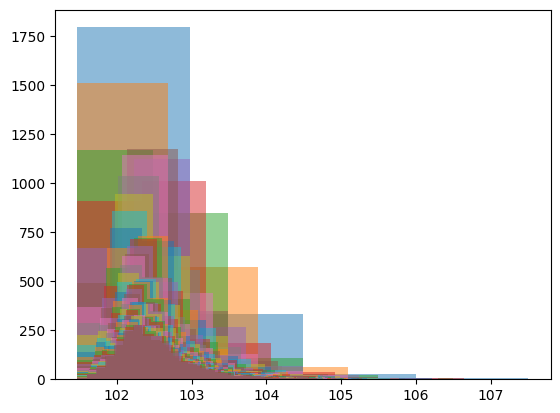

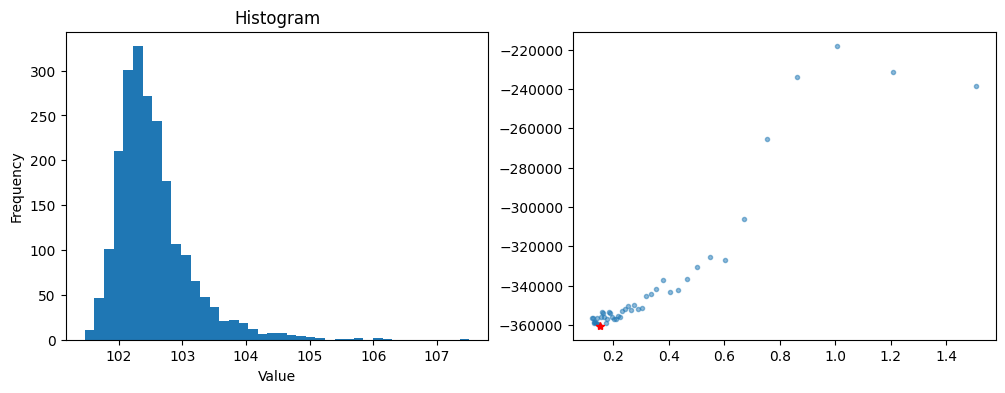

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Generate n pseudo-random numbers with(mu,sigma,n)
x = data

x_min, x_max = np.min(x), np.max(x)

N_MIN = 4  # Min number of bins (integer), must be > 1
N_MAX = 50  # Max number of bins (integer)

N = np.arange(N_MIN, N_MAX)  # number of bins
D = (x_max - x_min) / N  # Bin size vector
C = np.zeros(np.size(D))

# Computation of the cost function
for i in range(np.size(N)):
    edges = np.linspace(x_min, x_max, N[i] + 1)  # Bin edges
    ki = plt.hist(x, edges, alpha=0.5)[0]  # Count number of events in bins
    k = np.mean(ki)  # Mean of event count
    v = np.sum((ki - k) ** 2) / N[i]  # Variance of event count
    C[i] = (2 * k - v) / ((D[i]) ** 2)  # Cost Function

# Optimal bin size Selection
cmin = np.min(C)
idx = np.argmin(C)
optD = D[idx]

# Plotting
edges = np.linspace(x_min, x_max, N[idx] + 1)
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(x, edges)
plt.title("Histogram")
plt.ylabel("Frequency")
plt.xlabel("Value")
# plt.savefig('Hist.png')

plt.subplot(122)
plt.plot(D, C, ".", alpha=0.5)
plt.plot(optD, cmin, "*r")
# plt.savefig('Fobj.png')


In [64]:
len(edges)-1

40

In [61]:
N[idx]

40

In [19]:
fig = px.line(x=range(1, 100), y=list(map(lambda h: objective(h), range(1, 100))), markers=True)

fig.update_traces(
    marker=dict(color="red", size=7, symbol="x"),
    line=dict(color="blue", width=3),
)

fig.update_layout(
    coloraxis_showscale=False,
    height=400,
    width=600,
    xaxis={"title": "epoch"},
    yaxis={"title": "val-accuracy"},
    title="R2 vs. No. of epochs",
    template="ggplot2",
)
fig.show()


In [5]:
## max("fd", "sturges")
len(numpy.histogram_bin_edges(data, bins="auto"))

67

##### **Freedman Diaconis Estimator**
$$
h = 2 \frac{IQR}{n^{1/3}}
$$

In [6]:
len(numpy.histogram_bin_edges(data, bins="fd")) - 1, num_bins_freedman_diaconis(data)

(66, 66)

##### **Doane**
$$
n_h = 1 + \log_{2}(n) +\log_{2}\left(1 + \frac{|g_1|}{\sigma_{g_1}}\right)\\
g_1 = E\left[\left(\frac{x - \mu}{\sigma}\right)^3\right]\\
\sigma_{g_1} = \sqrt{\frac{6(n - 2)}{(n + 1)(n + 3)}}
$$

In [7]:
len(numpy.histogram_bin_edges(data, bins="doane")) - 1, num_bins_doane(data)

(18, 18)

##### **Scott**
$$
h = \sigma \sqrt[3]{\frac{24 \sqrt{\pi}}{n}}
$$

In [8]:
len(numpy.histogram_bin_edges(data, bins="scott")) - 1, num_bins_scott(data)

(39, 38)

##### **Stone**
$$

$$

In [9]:
len(numpy.histogram_bin_edges(data, bins="stone")) - 1, num_bins_stone(data)

(40, 12)

##### **Rice**
$$
n_h = 2n^{1/3}
$$

In [10]:
len(numpy.histogram_bin_edges(data, bins="rice")) - 1, num_bins_rice(data)

(26, 26)

##### **Sturges**
$$
n_h = \log _{2}(n) + 1
$$

In [11]:
len(numpy.histogram_bin_edges(data, bins="sturges")) - 1, num_bins_sturges(data)

(13, 13)

##### **Sqrt**
$$
n_h = \sqrt n
$$

In [12]:
len(numpy.histogram_bin_edges(data, bins="sqrt")) - 1, num_bins_sqrt(data)

(47, 47)